# Example Notebook for SeaDataNet Climatology data
Author(s): [Bjorn Backeberg](mailto:backeb@gmail.com) (backeb)

Creation date: 01-Aug-2019

Last updated: 06-Aug-2019

---

## Purpose

Load SeaDataNet Climatology computed from the SeaDataNet V1.1 aggregated regional datasets. Data can be downloaded [here](https://www.seadatanet.org/Products#/search?from=1&to=20).

Plot on map using cartopy

## Import necessary libraries

In [1]:
# EGI Datahub
import os
from fs.onedatafs import OnedataFS

import xarray as xr
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

## Import dataset

In [2]:
# Create connection to Oneprovider
odfs = OnedataFS(os.environ['ONEPROVIDER_HOST'],
                 os.environ['ONECLIENT_ACCESS_TOKEN'],
                 force_direct_io=True)

In [4]:
%%time

# load black arctic data
ds1 = xr.open_dataset(odfs.open('/notebooks-training-seadatanet/data/SDN_Clim_Arctic_Temperature.nc', 'rb'))

# display some of the metadata
print(ds1)

<xarray.Dataset>
Dimensions:                 (depth: 19, lat: 71, lon: 151, nv: 2, observations: 498728, time: 12)
Coordinates:
  * lon                     (lon) float32 27.0 27.1 27.2 27.3 ... 41.8 41.9 42.0
  * lat                     (lat) float32 40.5 40.6 40.7 40.8 ... 47.3 47.4 47.5
  * depth                   (depth) float32 2000.0 1500.0 1200.0 ... 10.0 0.0
  * time                    (time) datetime64[ns] 1957-01-16 ... 1957-12-16
    obslon                  (observations) float64 ...
    obslat                  (observations) float64 ...
    obsdepth                (observations) float64 ...
    obstime                 (observations) datetime64[ns] ...
Dimensions without coordinates: nv, observations
Data variables:
    climatology_bounds      (time, nv) float32 ...
    CORRLEN                 (time, depth) float32 ...
    SNR                     (time, depth) float32 ...
    VARBACK                 (time, depth) float32 ...
    Temperature             (time, depth, lat, lon)

In [5]:
%%time

# load baltic data
ds2 = xr.open_dataset(odfs.open('/notebooks-training-seadatanet/data/SDN_Clim_BalticSea_Temperature.nc', 'rb'))

CPU times: user 9.24 s, sys: 30 s, total: 39.3 s
Wall time: 39.7 s


In [6]:
# load the data into variables for plotting
lon1 = ds1.lon.values
lat1 = ds1.lat.values
depth1 = ds1.depth.values
time1 = ds1.time.values
temperature1 = ds1.Temperature.values

lon2 = ds2.lon.values
lat2 = ds2.lat.values
depth2 = ds2.depth.values
time2 = ds2.time.values
temperature2 = ds2.Temperature.values

## Plot on map using cartopy

TypeError: Dimensions of C (200, 200) are incompatible with X (151) and/or Y (71); see help(pcolormesh)

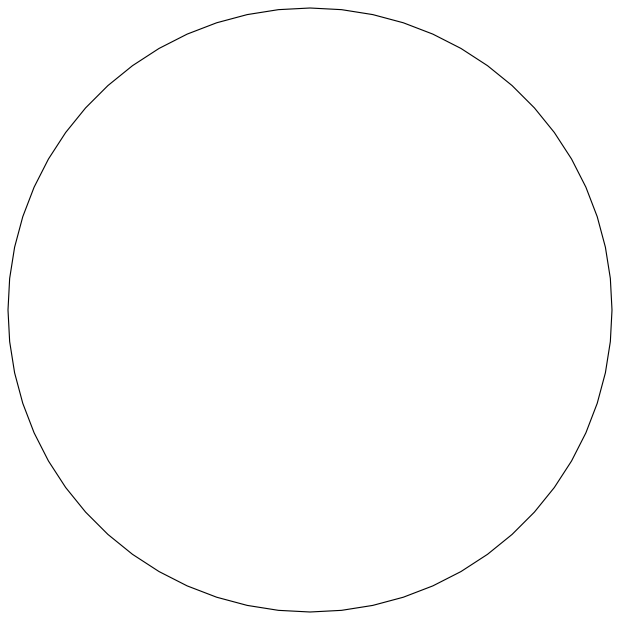

In [7]:
tm = 6 # set time to plot
dp = -1 # set depth to plot

# instantiate the figure
fig = plt.figure(figsize = (13, 10), dpi = 80) 

# set cartopy projection
central_longitude = np.median(np.concatenate((lon1, lon2), axis = None)).round()
central_latitude = np.median(np.concatenate((lat1, lat2), axis = None)).round()
ax = plt.axes(projection=ccrs.NearsidePerspective(central_longitude = central_longitude,
                                                  central_latitude = central_latitude))
# define temperature colour axis bounds
bounds = [np.nanmin(np.concatenate((temperature1, temperature2), axis = None)), 
          np.nanmax(np.concatenate((temperature1, temperature2), axis = None))]

# plot
cm = ax.pcolormesh(lon1, lat1, temperature1[tm,dp,:,:], 
              shading = 'gourand', 
              cmap = plt.cm.Spectral_r, 
              vmin = bounds[0], vmax = bounds[1],
              transform = ccrs.PlateCarree())

cm = ax.pcolormesh(lon2, lat2, temperature2[tm,dp,:,:], 
              shading = 'gourand', 
              cmap = plt.cm.Spectral_r,
              vmin = bounds[0], vmax = bounds[1],
              transform = ccrs.PlateCarree())


plt.colorbar(cm, orientation = 'vertical').set_label('[$^\circ$C]')

# add a coastline
coastline = cfeature.GSHHSFeature(scale = 'intermediate', edgecolor = 'none', facecolor = 'grey')
ax.add_feature(coastline)

# add a title
plt.title("SeaDataNet Temperature for "
          +str((pd.to_datetime(time1[tm])).strftime('%B'))
          +", depth = "+str(depth1[dp])+"m")

plt.show()

# Exercise 1
The above demo gives you an example of how to plot data from two regions on a map. We have plotted the following two data:
  * `SDN_Clim_Arctic_Temperature.nc`
  * `SDN_Clim_BalticSea_Temperature.nc`

For this exercise you will need to add the `SDN_Clim_BlackSea_Temperature.nc` to the map. Your final map should look something like this: <br>
 ![alt text](image.png)

# Exercise 2

Plot the salinity from all three regions on a map. The data files you will need are:
 * `SDN_Clim_Arctic_Salinity.nc`
 * `SDN_Clim_BalticSea_Salinity.nc`
 * `SDN_Clim_BlackSea_Salinity.nc`